Run below command to render sites in the notebook - 
https://pypi.org/project/HTMLrenderer/

In [53]:
!pip install HTMLrenderer -q

# Slides used

In [55]:
from HTMLrenderer.render import render_site

URL = "https://slides.com/supremecommander/cnn-architecture/fullscreen"
render_site(URL=URL, width="100%", height="600", source=True)

ModuleNotFoundError: ignored

# CNN Explainer [Check at the end] -

In [3]:
import os
ROOT = "/content/drive/MyDrive/Computer_vision"
os.chdir(ROOT)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.getcwd()

'/content/drive/MyDrive/Computer_vision'

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    return img
  try:
    cv2.imshow("display", img) # This works on your local PC
    return img
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow # This is on your colab
    cv2_imshow(img)
    return img


In [7]:
img_path = "car.jpg"

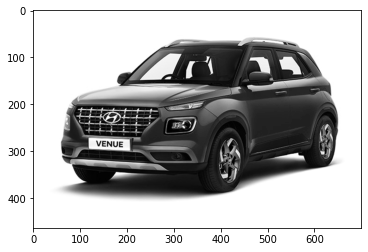

In [8]:
car = read_img(path=img_path, grayscale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



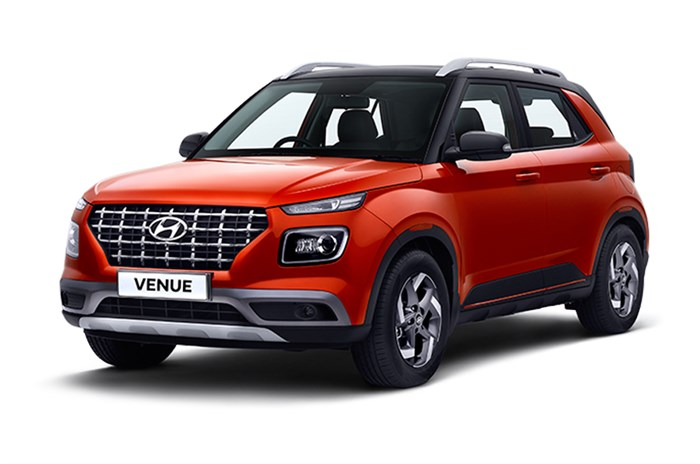

In [9]:
color_car = read_img(path=img_path, grayscale=False)


In [10]:
car.shape

(464, 700)

In [11]:
color_car.shape


(464, 700, 3)

# apply a single conv layer

In [12]:
row, col = car.shape
batch = 1 # single image is there
ch = 1 # grayscale
reshaped_car_img = car.reshape(batch, row, col, ch) 
reshaped_car_img.shape

(1, 464, 700, 1)

In [13]:
input_shape = reshaped_car_img.shape[1:]

CONV_LAYER = [
  
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 462, 698, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [14]:
3*3 + 1

10

In [16]:
out = conv_model.predict(car)

ValueError: ignored

In [17]:
out = conv_model.predict(reshaped_car_img)

In [18]:
out.shape

(1, 462, 698, 1)

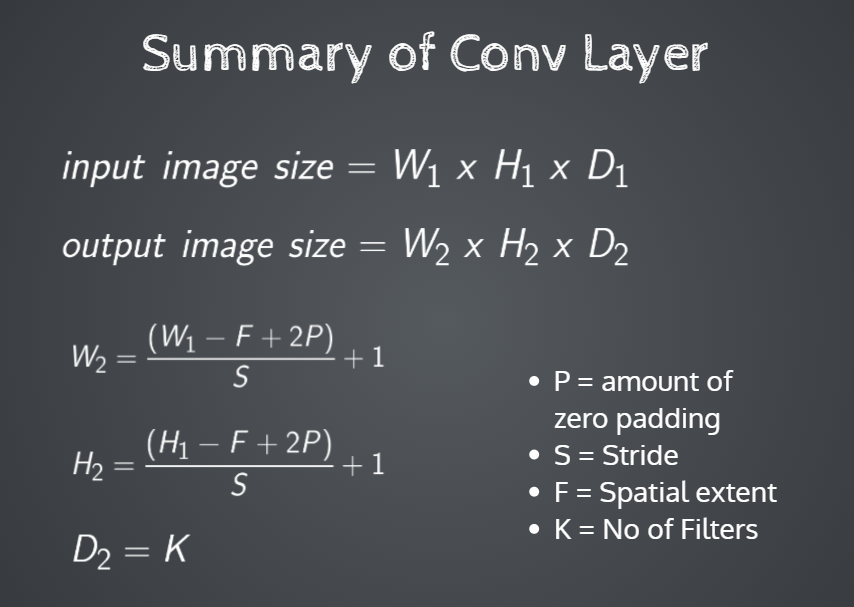

In [ ]:
(168 - 3 + 2*(0))//1 + 1

166

In [ ]:
(300 - 3 + 2*(0))//1 + 1

298

TypeError: ignored

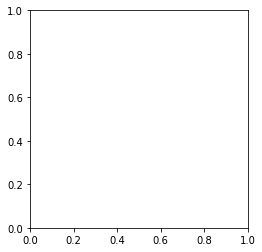

In [20]:
plt.imshow(out, cmap="gray")

In [21]:
row, col = out.shape[1:-1]
row, col

(462, 698)

In [22]:
_, row, col, _ = out.shape
row, col

(462, 698)

In [23]:
reshape_out = out.reshape(row, col)
reshape_out.shape

(462, 698)

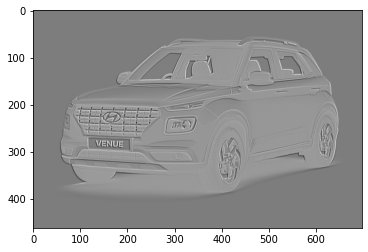

In [24]:
plt.imshow(reshape_out, cmap="gray")

# For color image

In [25]:
color_car.shape

(464, 700, 3)

In [26]:
# (1, r, c, ch)
row,col,ch = color_car.shape
color_car_reshaped = color_car.reshape(1, row,col,ch)
color_car_reshaped.shape

(1, 464, 700, 3)

In [27]:
input_shape = color_car_reshaped.shape[1:]

CONV_LAYER = [
  
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 462, 698, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [28]:
3*3*3 + 1

28

In [29]:
out = conv_model.predict(color_car_reshaped)

In [ ]:
out.shape

(1, 462, 698, 1)

In [ ]:
(464 - 3 + 2*0)//1 + 1

462

In [ ]:
(698 - 3 + 2*0)//1 + 1

696

In [30]:
_, row, col, _ = out.shape
row, col

(462, 698)

In [31]:
reshape_out = out.reshape(row, col)
reshape_out.shape

(462, 698)

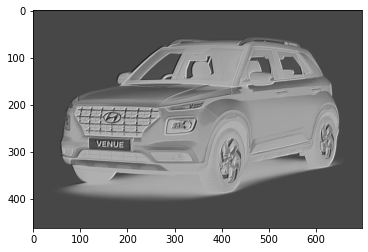

In [32]:
plt.imshow(reshape_out, cmap="gray")

In [33]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1, row, col, 1) # grayscale
    return img
  # else:
  row, col, ch = img.shape
  color_img = img.reshape(1, row, col, ch)
  return color_img

In [35]:
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):

  CONV_LAYER = [
    
      tf.keras.layers.Conv2D(
          filters=filters, 
          kernel_size=kernel_size, 
          strides=strides, 
          input_shape=input_shape)
  ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [34]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshape_out = out.reshape(row, col, channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    raise e

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



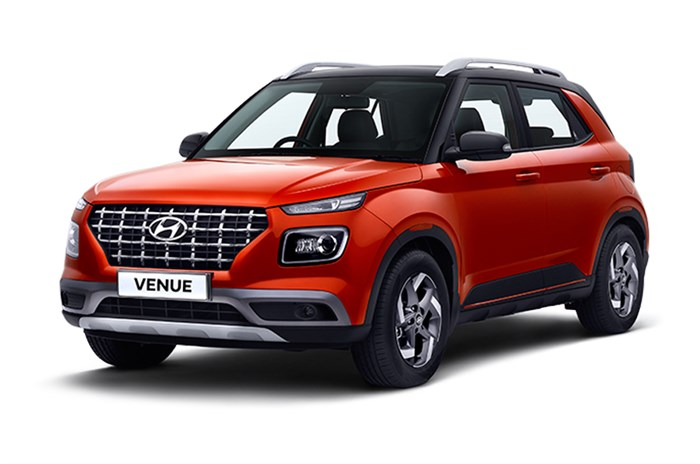

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 462, 698, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 462, 698, 1)


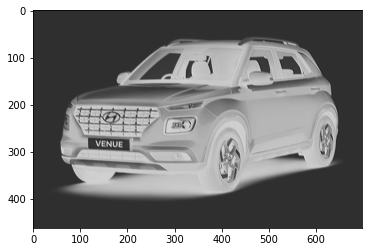

In [36]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=1, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



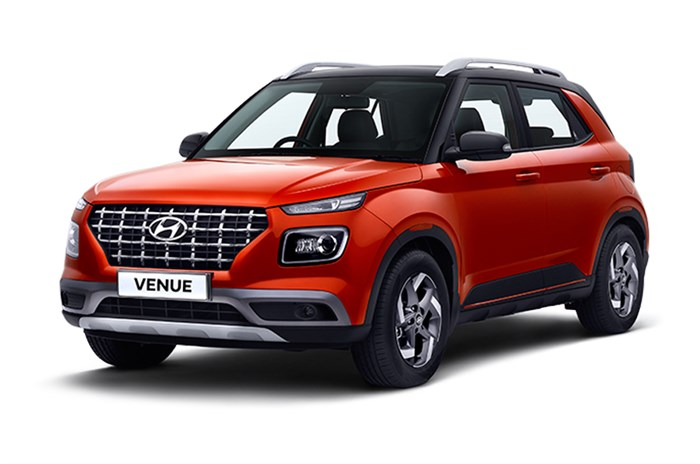

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 462, 698, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
(1, 462, 698, 5)


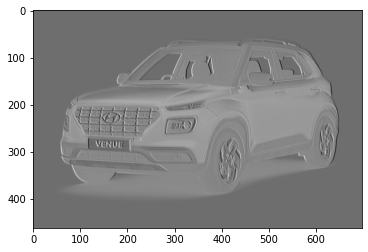

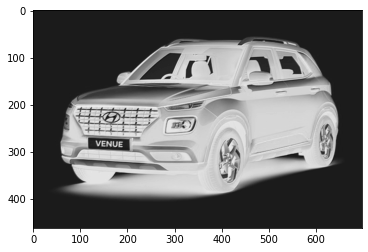

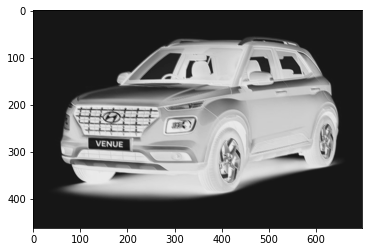

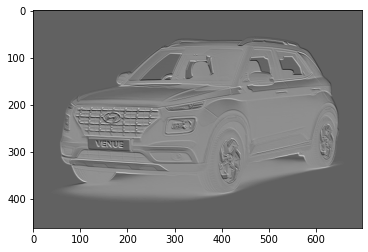

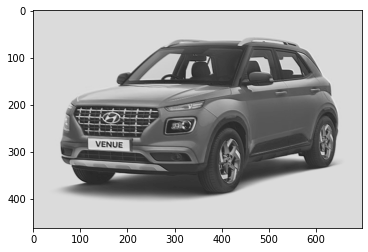

In [37]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=5, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

In [ ]:
28*5

140

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 462, 698, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


(1, 462, 698, 1)


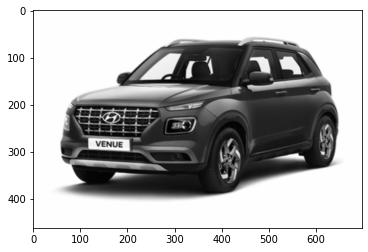

In [38]:
img = read_img(img_path, grayscale=True)
input_img = reshaping_in(img, grayscale=True)
model = get_conv_model(filters=1, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 462, 698, 5)       50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
(1, 462, 698, 5)


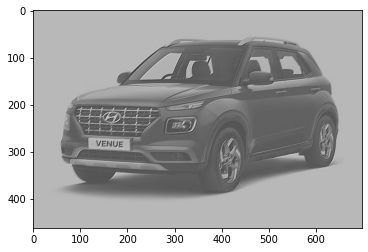

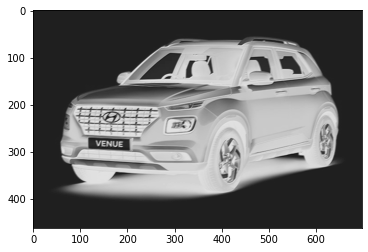

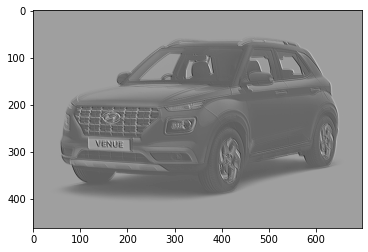

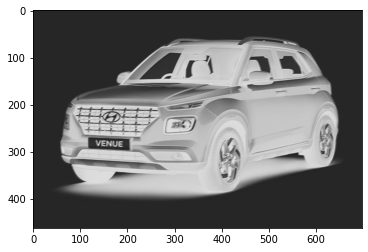

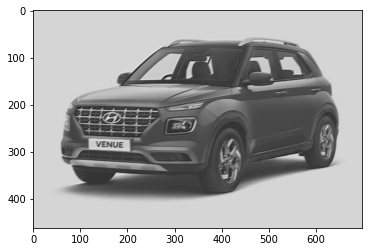

In [ ]:
img = read_img(img_path, grayscale=True)
input_img = reshaping_in(img, grayscale=True)
model = get_conv_model(filters=5, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

In [39]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, 
                                            strides=strides)
  
  result = pooling_layer(reshaped_img)
  return result

(464, 700)


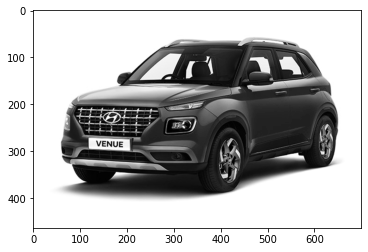

In [40]:
img = read_img(img_path)
print(img.shape)

In [41]:
result = max_pooling(img)
print(result.shape)

(1, 232, 350, 1)


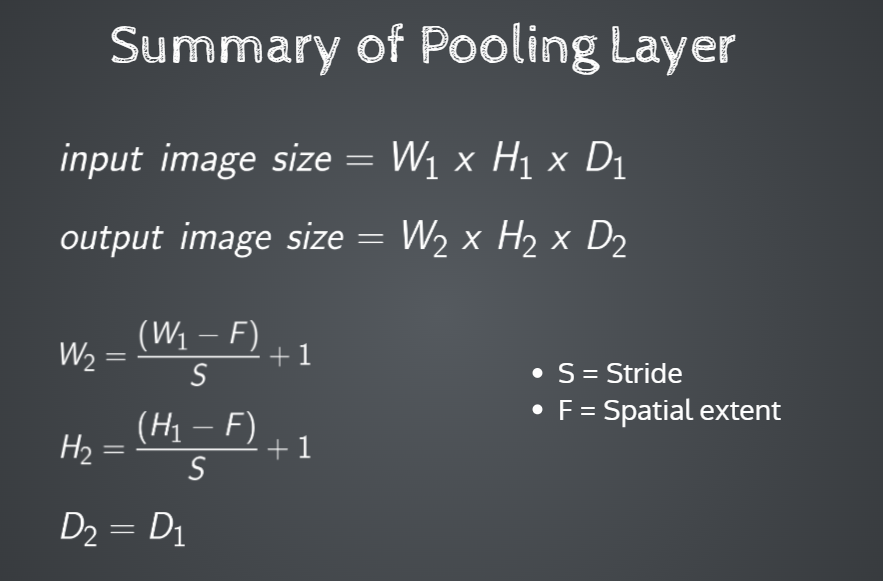

In [ ]:
(168 - 2)//2 + 1

84

In [ ]:
(300 - 2)//2 + 1

150

In [42]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img, cmap="gray")

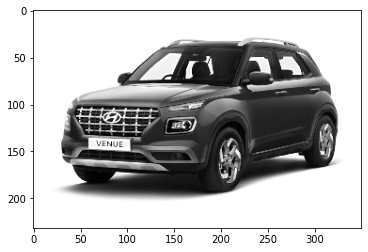

In [43]:
plot_pooling(result)

In [44]:
_, row, col, _ = result.shape

reshape = tf.reshape(result, (row, col))

In [45]:
result = max_pooling(reshape.numpy())
result.shape

TensorShape([1, 116, 175, 1])

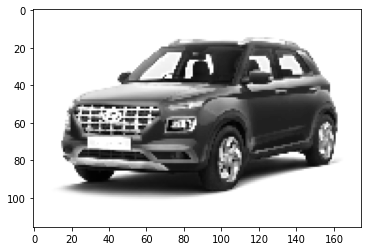

In [46]:
plot_pooling(result)

# CNN Explainer - 


In [52]:
URL = "https://poloclub.github.io/cnn-explainer/"
render_site(URL)

NameError: ignored